In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [263]:
df = pd.read_csv('data.csv')
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


In [264]:
df.dropna(axis=0, inplace=True)

In [265]:
df['MONAT'] = df['MONAT'].str.slice(4, )
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
13,Alkoholunfälle,insgesamt,2021,01,16.0,28.0,23.08,-42.86,35.0
14,Alkoholunfälle,insgesamt,2021,02,14.0,40.0,-12.50,-65.00,33.0
15,Alkoholunfälle,insgesamt,2021,03,24.0,27.0,71.43,-11.11,32.0
16,Alkoholunfälle,insgesamt,2021,04,16.0,26.0,-33.33,-38.46,32.0
17,Alkoholunfälle,insgesamt,2021,05,24.0,40.0,50.00,-40.00,30.0


In [266]:
df.drop(columns=df.columns[-4:], axis=1, inplace=True)

In [267]:
df = df.rename(columns={'MONATSZAHL': 'Category', 'AUSPRAEGUNG': 'Type', 
                'JAHR': 'Year', 'MONAT': 'Month', 'WERT': 'Value'})

In [268]:
features = list(df.columns)
features

['Category', 'Type', 'Year', 'Month', 'Value']

In [269]:
for feature in features:
    print(f"{feature} has {df[feature].nunique()} unique values")
    
for feature in features[:2]:
    print(f'\n{feature}') 
    for category in df[feature].unique():
        print(f"{category} has {df[df[feature] == category].shape[0]} entries")

Category has 3 unique values
Type has 3 unique values
Year has 21 unique values
Month has 12 unique values
Value has 824 unique values

Category
Alkoholunfälle has 502 entries
Fluchtunfälle has 504 entries
Verkehrsunfälle has 756 entries

Type
insgesamt has 756 entries
Verletzte und Getötete has 754 entries
mit Personenschäden has 252 entries


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 13 to 2072
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  1762 non-null   object 
 1   Type      1762 non-null   object 
 2   Year      1762 non-null   int64  
 3   Month     1762 non-null   object 
 4   Value     1762 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 82.6+ KB


In [271]:
years = list(df['Year'])
years.sort()

In [272]:
mappings = {}

for feature in features[0:2]:
    mappings[feature] = dict(enumerate(df[feature].astype('category').cat.categories))
    df[feature]=df[feature].astype('category').cat.codes

In [273]:
mappings

{'Category': {0: 'Alkoholunfälle', 1: 'Fluchtunfälle', 2: 'Verkehrsunfälle'},
 'Type': {0: 'Verletzte und Getötete',
  1: 'insgesamt',
  2: 'mit Personenschäden'}}

In [274]:
def encode_month(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

min_year = df['Year'].min()

def encode_year(data):
    min = data['Year'].min()
    data['Year'] = data['Year'] - min

def decode_year(data):
    data['Year'] = data['Year'] + min_year

df['Month'] = pd.to_datetime(df['Month'], format='%m').dt.month
df = encode_month(df, 'Month', 12)
encode_year(df)

In [275]:
months = df['Month']
df.drop('Month', axis=1, inplace=True)

In [276]:
df.head()

,Category,Type,Year,Value,Month_sin,Month_cos
13,0,1,20,16.0,0.500000,8.660254e-01
14,0,1,20,14.0,0.866025,5.000000e-01
15,0,1,20,24.0,1.000000,6.123234e-17
16,0,1,20,16.0,0.866025,-5.000000e-01
17,0,1,20,24.0,0.500000,-8.660254e-01


In [277]:
test = df[df['Year'] == 20]
train = df[df['Year'] != 20]

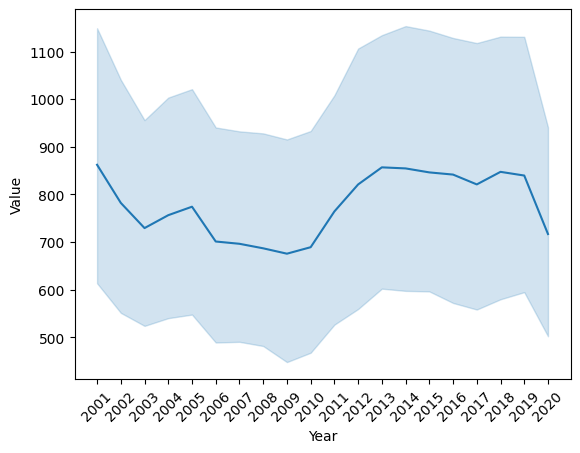

In [280]:
def decode_and_plot(data, add_year):
    df_copy = data.copy()
    if (df_copy['Year'].iloc[0] < 100):
        decode_year(df_copy)
    sns.lineplot(x='Year', y='Value', data=df_copy)
    plt.xticks(sorted(df_copy['Year'].unique()) + add_year, rotation=45)
    plt.show()

decode_and_plot(train, [])